# KNN

# 라이브러리 다운


In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# for coloring maps
from matplotlib import colormaps

# for data visualizations

import plotly.express as px

# for preprocessing
from sklearn.preprocessing import StandardScaler

# for label encoding
from sklearn.preprocessing import LabelEncoder

# for data split
from sklearn.model_selection import train_test_split

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df_O = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cap/융합캡스톤디자인_환자군.csv')
df_X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cap/융합캡스톤디자인_TGAN.csv')

df_O 데이터프레임은 국립암센터의 FAKE DATA 받은 것을 전처리 한 뒤, 예측에 사용 가능한 칼럼만을 골라내어 만든 데이터프레임이다. 이 때 후자의 경우 엑셀 기능을 활용하였다.

df_X 데이터프레임은 이전, TGAN 모델학습을 통해 만든 데이터를, df_O 데이터프레임의 칼럼과 같은 것을 만들어 삽입한 데이터프레임이다. 이 때, 엑셀 기능을 활용하였다.

In [14]:
#두 데이터프레임 결합
df_X = df_X.drop(0)

# 두 데이터프레임을 결합
df = pd.concat([df_O, df_X], ignore_index=True)

In [15]:
df

,UCLN_OPN_ETC_SITE_CRCN_YN,UCLN_PRGN_YN,RDT_DTRN_YN,RDT_RT_NO,RDT_DTRN_DCNT,RDT_SITE_KIND_CD,RDT_SITE_CD,RDT_TM1_CGY,RDT_TOTL_TRTM_NT,RDT_TOTL_CGY,...,HRT_USE_YN,HRT_DTRN_MCNT,HT_VL,WT_MSRM_VL,BMI_VL,BRCA1_PAVR_DTCT_CLSF_CD,BRCA1_UNCL_VARN_DTCT_CLSF_CD,BRCA2_PAVR_DTCT_CLSF_CD,BRCA2_UNCL_VARN_DTCT_CLSF_CD,target
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4.0,156.0,70.0,28.76,0,0,0,0,1
1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,152.0,61.0,26.40,0,0,0,0,1
2,1,0.0,1.0,18.0,63.0,99.0,10.0,9922.0,8876.0,1073.0,...,0,0.0,153.0,60.0,25.63,0,0,0,0,1
3,1,1.0,1.0,35.0,7.0,99.0,22.0,3740.0,5905.0,999.0,...,0,0.0,153.0,64.0,27.34,0,0,0,0,1
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,6.0,156.9,69.2,28.11,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24474,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,174.8,40.7,13.30,1,1,1,1,0
24475,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,145.2,40.0,19.00,1,1,1,1,0
24476,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0.0,175.0,42.4,13.80,1,1,1,1,0
24477,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,175.0,40.5,13.20,1,1,1,1,0


In [17]:
# invalid value 찾기
duplicate = df.duplicated()
print(duplicate.sum())

672


In [18]:
# 결측치가 있는 행 삭제
threshold = 0.5  # 삭제할 열의 결측치 비율 기준 설정 (예: 50%)
df.dropna(thresh=threshold*len(df_O.columns), inplace=True)

# 삭제된 행을 제외한 나머지 행을 새로운 CSV 파일로 저장
df.to_csv('cleaned_file.csv', index=False)

In [19]:
df

,UCLN_OPN_ETC_SITE_CRCN_YN,UCLN_PRGN_YN,RDT_DTRN_YN,RDT_RT_NO,RDT_DTRN_DCNT,RDT_SITE_KIND_CD,RDT_SITE_CD,RDT_TM1_CGY,RDT_TOTL_TRTM_NT,RDT_TOTL_CGY,...,HRT_USE_YN,HRT_DTRN_MCNT,HT_VL,WT_MSRM_VL,BMI_VL,BRCA1_PAVR_DTCT_CLSF_CD,BRCA1_UNCL_VARN_DTCT_CLSF_CD,BRCA2_PAVR_DTCT_CLSF_CD,BRCA2_UNCL_VARN_DTCT_CLSF_CD,target
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4.0,156.0,70.0,28.76,0,0,0,0,1
1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,152.0,61.0,26.40,0,0,0,0,1
2,1,0.0,1.0,18.0,63.0,99.0,10.0,9922.0,8876.0,1073.0,...,0,0.0,153.0,60.0,25.63,0,0,0,0,1
3,1,1.0,1.0,35.0,7.0,99.0,22.0,3740.0,5905.0,999.0,...,0,0.0,153.0,64.0,27.34,0,0,0,0,1
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,6.0,156.9,69.2,28.11,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24474,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,174.8,40.7,13.30,1,1,1,1,0
24475,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,145.2,40.0,19.00,1,1,1,1,0
24476,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0.0,175.0,42.4,13.80,1,1,1,1,0
24477,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,175.0,40.5,13.20,1,1,1,1,0


In [21]:
df_select = df[['UCLN_OPN_ETC_SITE_CRCN_YN','UCLN_PRGN_YN','RDT_DTRN_YN','RDT_RT_NO','RDT_DTRN_DCNT','RDT_SITE_KIND_CD','RDT_SITE_CD','RDT_TM1_CGY','RDT_TOTL_TRTM_NT','RDT_TOTL_CGY','HORM_TRTM_YN','HORM_TRTM_PRPS_CD','HORM_TRTM_INGR_NM','HORM_TRTM_DTRN_DCNT','IMPT_ER_EXAM_RSLT_CD','IMPT_PR_EXAM_RSLT_CD','IMPT_AR_EXAM_RSLT_CD','IDGN_AGE','PT_SEX_CD','DRNK_YN','DRNK_STRT_AGE','DRNK_KIND_CD','DRNK_QTY','DRNK_NT','DRNK_DTRN_YCNT','CUR_SMOK_YN','SHIS_YN','SMOK_STRT_AGE','SMOK_QTY','SMOK_DTRN_YCNT','NSMK_PERD_YCNT','MHIS_YN','MHIS_HTN_YN','MHIS_DBT_YN','MHIS_TB_YN','MHIS_LVDS_YN','MHIS_CNCR_YN','MHIS_DEPR_YN','MHIS_INSM_YN','MHIS_CADS_YN','ETC_MHIS_YN','LATST_MDCT_YN','MDCA_YN','MENA_AGE','MENO_YN','MENO_AGE','MENS_CYCL_DCNT','MARG_YN','DELV_YN','FDLV_AGE','DELV_CHLD_CNT','BRFD_EXPR_YN','FEED_DTRN_MCNT','MHIS_BRST_OPRT_YN','OC_USE_YN','OC_USE_DTRN_MCNT','HRT_USE_YN','HRT_DTRN_MCNT','HT_VL','WT_MSRM_VL','BMI_VL','BRCA1_PAVR_DTCT_CLSF_CD','BRCA1_UNCL_VARN_DTCT_CLSF_CD','BRCA2_PAVR_DTCT_CLSF_CD','BRCA2_UNCL_VARN_DTCT_CLSF_CD','target']]

# knn 코드

In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import KNNImputer


# Columns to impute
columns_to_impute =['UCLN_OPN_ETC_SITE_CRCN_YN','UCLN_PRGN_YN','RDT_DTRN_YN','RDT_RT_NO','RDT_DTRN_DCNT','RDT_SITE_KIND_CD','RDT_SITE_CD','RDT_TM1_CGY','RDT_TOTL_TRTM_NT','RDT_TOTL_CGY','HORM_TRTM_YN','HORM_TRTM_PRPS_CD','HORM_TRTM_INGR_NM','HORM_TRTM_DTRN_DCNT','IMPT_ER_EXAM_RSLT_CD','IMPT_PR_EXAM_RSLT_CD','IMPT_AR_EXAM_RSLT_CD','IDGN_AGE','PT_SEX_CD','DRNK_YN','DRNK_STRT_AGE','DRNK_KIND_CD','DRNK_QTY','DRNK_NT','DRNK_DTRN_YCNT','CUR_SMOK_YN','SHIS_YN','SMOK_STRT_AGE','SMOK_QTY','SMOK_DTRN_YCNT','NSMK_PERD_YCNT','MHIS_YN','MHIS_HTN_YN','MHIS_DBT_YN','MHIS_TB_YN','MHIS_LVDS_YN','MHIS_CNCR_YN','MHIS_DEPR_YN','MHIS_INSM_YN','MHIS_CADS_YN','ETC_MHIS_YN','LATST_MDCT_YN','MDCA_YN','MENA_AGE','MENO_YN','MENO_AGE','MENS_CYCL_DCNT','MARG_YN','DELV_YN','FDLV_AGE','DELV_CHLD_CNT','BRFD_EXPR_YN','FEED_DTRN_MCNT','MHIS_BRST_OPRT_YN','OC_USE_YN','OC_USE_DTRN_MCNT','HRT_USE_YN','HRT_DTRN_MCNT','HT_VL','WT_MSRM_VL','BMI_VL','BRCA1_PAVR_DTCT_CLSF_CD','BRCA1_UNCL_VARN_DTCT_CLSF_CD','BRCA2_PAVR_DTCT_CLSF_CD','BRCA2_UNCL_VARN_DTCT_CLSF_CD','target']
# Columns to leave without imputation
columns_to_leave = df.columns.difference(columns_to_impute)

# Separate numeric and non-numeric columns
numeric_cols_to_impute = df[columns_to_impute].select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Verify the columns
print(f"Columns to impute: {numeric_cols_to_impute}")
print(f"Number of columns to impute: {len(numeric_cols_to_impute)}")

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Fit and transform only the numeric columns for the selected columns
data_filled_numeric = imputer.fit_transform(df[numeric_cols_to_impute])

# Convert the result back to a DataFrame
df_O_numeric = pd.DataFrame(data_filled_numeric, columns=numeric_cols_to_impute)

# Verify the filled numeric DataFrame
print(f"Filled numeric DataFrame columns: {df_O_numeric.columns}")
print(f"Number of filled numeric DataFrame columns: {len(df_O_numeric.columns)}")

# Replace the imputed columns in the original DataFrame
df[numeric_cols_to_impute] = df_O_numeric

# Combine with non-numeric columns
df_KNN = pd.concat([df, df[non_numeric_cols]], axis=1)

# Output the filled DataFrame
print(df_KNN)

Columns to impute: Index(['UCLN_OPN_ETC_SITE_CRCN_YN', 'UCLN_PRGN_YN', 'RDT_DTRN_YN', 'RDT_RT_NO',
       'RDT_DTRN_DCNT', 'RDT_SITE_KIND_CD', 'RDT_SITE_CD', 'RDT_TM1_CGY',
       'RDT_TOTL_TRTM_NT', 'RDT_TOTL_CGY', 'HORM_TRTM_YN', 'HORM_TRTM_PRPS_CD',
       'HORM_TRTM_INGR_NM', 'HORM_TRTM_DTRN_DCNT', 'IMPT_ER_EXAM_RSLT_CD',
       'IMPT_PR_EXAM_RSLT_CD', 'IMPT_AR_EXAM_RSLT_CD', 'IDGN_AGE', 'PT_SEX_CD',
       'DRNK_YN', 'DRNK_STRT_AGE', 'DRNK_KIND_CD', 'DRNK_QTY', 'DRNK_NT',
       'DRNK_DTRN_YCNT', 'CUR_SMOK_YN', 'SHIS_YN', 'SMOK_STRT_AGE', 'SMOK_QTY',
       'SMOK_DTRN_YCNT', 'NSMK_PERD_YCNT', 'MHIS_YN', 'MHIS_HTN_YN',
       'MHIS_DBT_YN', 'MHIS_TB_YN', 'MHIS_LVDS_YN', 'MHIS_CNCR_YN',
       'MHIS_DEPR_YN', 'MHIS_INSM_YN', 'MHIS_CADS_YN', 'ETC_MHIS_YN',
       'LATST_MDCT_YN', 'MDCA_YN', 'MENA_AGE', 'MENO_YN', 'MENO_AGE',
       'MENS_CYCL_DCNT', 'MARG_YN', 'DELV_YN', 'FDLV_AGE', 'DELV_CHLD_CNT',
       'BRFD_EXPR_YN', 'FEED_DTRN_MCNT', 'MHIS_BRST_OPRT_YN', 'OC_USE_YN',
       'OC

In [23]:
# invalid value 찾기
duplicate = df_KNN.duplicated()
print(duplicate.sum())
# invalid value 제거
df_KNN.drop_duplicates(inplace=True)
# invalid value 제거 확인
duplicate = df_KNN.duplicated()
print(duplicate.sum())

672
0


In [24]:
# missing value 찾기
null = pd.DataFrame({'Null Values' : df_KNN.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df_KNN.isna().sum().sort_values(ascending=False)) / (df_KNN.shape[0]) * (100)})
null.style.background_gradient(cmap="YlGnBu")

,Null Values,Percentage Null Values
UCLN_OPN_ETC_SITE_CRCN_YN,0,0.000000
FDLV_AGE,0,0.000000
MHIS_LVDS_YN,0,0.000000
MHIS_CNCR_YN,0,0.000000
MHIS_DEPR_YN,0,0.000000
MHIS_INSM_YN,0,0.000000
MHIS_CADS_YN,0,0.000000
ETC_MHIS_YN,0,0.000000
LATST_MDCT_YN,0,0.000000
MDCA_YN,0,0.000000


In [32]:
# outlier 찾기
cat_features = [col for col in df_KNN.columns if df_KNN[col].dtype=='O']
num_features = [col for col in df_KNN.columns if df_KNN[col].dtype!='O']
cat_data=df_KNN[cat_features]
cat_data.head()

""
0
1
2
3
4


In [33]:
num_data = df_KNN[num_features]
num_data.head()

,UCLN_OPN_ETC_SITE_CRCN_YN,UCLN_PRGN_YN,RDT_DTRN_YN,RDT_RT_NO,RDT_DTRN_DCNT,RDT_SITE_KIND_CD,RDT_SITE_CD,RDT_TM1_CGY,RDT_TOTL_TRTM_NT,RDT_TOTL_CGY,...,HRT_USE_YN,HRT_DTRN_MCNT,HT_VL,WT_MSRM_VL,BMI_VL,BRCA1_PAVR_DTCT_CLSF_CD,BRCA1_UNCL_VARN_DTCT_CLSF_CD,BRCA2_PAVR_DTCT_CLSF_CD,BRCA2_UNCL_VARN_DTCT_CLSF_CD,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,156.0,70.0,28.76,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,152.0,61.0,26.40,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,18.0,63.0,99.0,10.0,9922.0,8876.0,1073.0,...,0.0,0.0,153.0,60.0,25.63,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,35.0,7.0,99.0,22.0,3740.0,5905.0,999.0,...,0.0,0.0,153.0,64.0,27.34,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.0,156.9,69.2,28.11,0.0,0.0,0.0,0.0,1.0


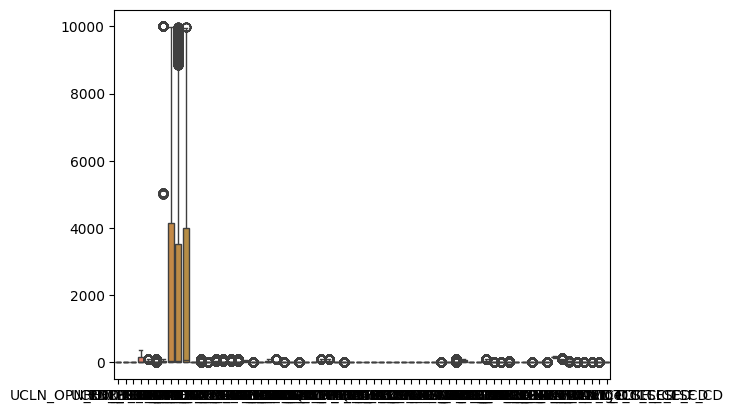

In [34]:
fig, ax = plt.subplots()
bp = sns.boxplot(data = num_data)

In [35]:
# 조금 더 자세히 outlier를 분석하기 위해 standard scaler 이용
scaler = StandardScaler()
scaled_array = scaler.fit_transform(num_data)

scaled_data = pd.DataFrame(scaled_array, columns = num_data.columns)
scaled_data.head()

,UCLN_OPN_ETC_SITE_CRCN_YN,UCLN_PRGN_YN,RDT_DTRN_YN,RDT_RT_NO,RDT_DTRN_DCNT,RDT_SITE_KIND_CD,RDT_SITE_CD,RDT_TM1_CGY,RDT_TOTL_TRTM_NT,RDT_TOTL_CGY,...,HRT_USE_YN,HRT_DTRN_MCNT,HT_VL,WT_MSRM_VL,BMI_VL,BRCA1_PAVR_DTCT_CLSF_CD,BRCA1_UNCL_VARN_DTCT_CLSF_CD,BRCA2_PAVR_DTCT_CLSF_CD,BRCA2_UNCL_VARN_DTCT_CLSF_CD,target
0,-0.587326,-0.615852,-0.923334,-0.810224,-0.742048,-0.302633,-0.189197,-0.756899,-0.756062,-0.767909,...,0.667375,1.110706,-0.311171,0.227205,0.401161,-0.239308,-0.239519,-0.239303,-0.239604,0.952687
1,-0.587326,1.636832,-0.923334,-0.810224,-0.742048,-0.302633,-0.189197,-0.756899,-0.756062,-0.767909,...,-1.498409,-0.509252,-0.769737,-0.362805,-0.003425,-0.239308,-0.239519,-0.239303,-0.239604,0.952687
2,1.702631,-0.615852,1.342365,-0.643413,1.484606,5.241710,-0.182935,2.843232,2.507566,-0.400935,...,-1.498409,-0.509252,-0.655096,-0.428361,-0.135430,-0.239308,-0.239519,-0.239303,-0.239604,0.952687
3,1.702631,1.636832,1.342365,-0.485869,-0.494642,5.241710,-0.175421,0.600135,1.415155,-0.426244,...,-1.498409,-0.509252,-0.655096,-0.166135,0.157724,-0.239308,-0.239519,-0.239303,-0.239604,0.952687
4,1.702631,-0.615852,-0.923334,-0.810224,-0.742048,-0.302633,-0.189197,-0.756899,-0.756062,-0.767909,...,0.667375,1.920684,-0.207993,0.174760,0.289728,-0.239308,-0.239519,-0.239303,-0.239604,0.952687


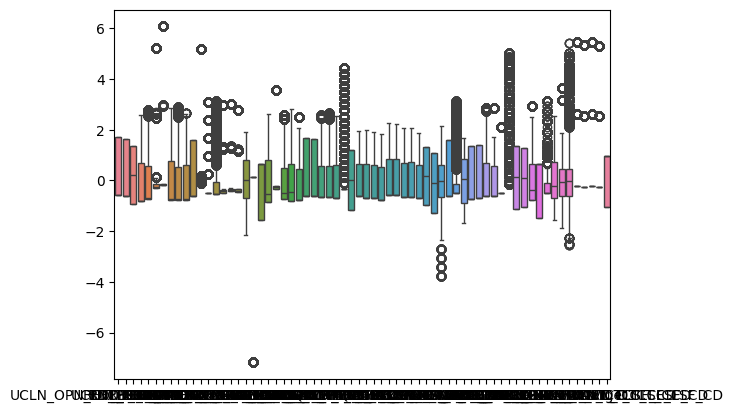

In [36]:
fig, ax = plt.subplots()
bp = sns.boxplot(data = scaled_data)


In [37]:
# outliers 제거
Q1 = num_data.quantile(0.25)
Q3 = num_data.quantile(0.75)
IQR = Q3 - Q1

num_data = num_data[~ ((num_data < (Q1 - 1.5 * IQR)) | (num_data > (Q3 + 1.5 * IQR))).any(axis=1)]
cat_data = cat_data.loc[num_data.index]

p_data = pd.concat([cat_data, num_data], axis=1)
p_data.shape

(4741, 66)

In [38]:
# label encoding (sex, smoker, region)
le = LabelEncoder()

for col in cat_features:
    df[col]=le.fit_transform(df[col])

df.head().style.background_gradient(cmap="YlGnBu")

,UCLN_OPN_ETC_SITE_CRCN_YN,UCLN_PRGN_YN,RDT_DTRN_YN,RDT_RT_NO,RDT_DTRN_DCNT,RDT_SITE_KIND_CD,RDT_SITE_CD,RDT_TM1_CGY,RDT_TOTL_TRTM_NT,RDT_TOTL_CGY,HORM_TRTM_YN,HORM_TRTM_PRPS_CD,HORM_TRTM_INGR_NM,HORM_TRTM_DTRN_DCNT,IMPT_ER_EXAM_RSLT_CD,IMPT_PR_EXAM_RSLT_CD,IMPT_AR_EXAM_RSLT_CD,IDGN_AGE,PT_SEX_CD,DRNK_YN,DRNK_STRT_AGE,DRNK_KIND_CD,DRNK_QTY,DRNK_NT,DRNK_DTRN_YCNT,CUR_SMOK_YN,SHIS_YN,SMOK_STRT_AGE,SMOK_QTY,SMOK_DTRN_YCNT,NSMK_PERD_YCNT,MHIS_YN,MHIS_HTN_YN,MHIS_DBT_YN,MHIS_TB_YN,MHIS_LVDS_YN,MHIS_CNCR_YN,MHIS_DEPR_YN,MHIS_INSM_YN,MHIS_CADS_YN,ETC_MHIS_YN,LATST_MDCT_YN,MDCA_YN,MENA_AGE,MENO_YN,MENO_AGE,MENS_CYCL_DCNT,MARG_YN,DELV_YN,FDLV_AGE,DELV_CHLD_CNT,BRFD_EXPR_YN,FEED_DTRN_MCNT,MHIS_BRST_OPRT_YN,OC_USE_YN,OC_USE_DTRN_MCNT,HRT_USE_YN,HRT_DTRN_MCNT,HT_VL,WT_MSRM_VL,BMI_VL,BRCA1_PAVR_DTCT_CLSF_CD,BRCA1_UNCL_VARN_DTCT_CLSF_CD,BRCA2_PAVR_DTCT_CLSF_CD,BRCA2_UNCL_VARN_DTCT_CLSF_CD,target
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,1.000000,1.000000,0.500000,1.000000,10.000000,3.000000,2.000000,1.000000,1.000000,36.000000,79.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,1.000000,12.000000,90.000000,1.000000,1.000000,91.000000,1.000000,0.000000,0.000000,1.000000,1.000000,7.000000,1.000000,4.000000,156.000000,70.000000,28.760000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,99.000000,5.000000,47.000000,4.000000,99.000000,4.000000,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,36.000000,79.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,0.000000,100.000000,1.000000,1.000000,38.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,152.000000,61.000000,26.400000,0.000000,0.000000,0.000000,0.000000,1.000000
2,1.000000,0.000000,1.000000,18.000000,63.000000,99.000000,10.000000,9922.000000,8876.000000,1073.000000,1.000000,99.000000,5.000000,91.000000,4.000000,99.000000,1.000000,43.000000,1.000000,1.000000,15.000000,99.000000,12.000000,14.000000,2.000000,1.000000,1.000000,35.000000,68.000000,13.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000,0.000000,0.000000,88.000000,1.000000,1.000000,63.000000,2.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,153.000000,60.000000,25.630000,0.000000,0.000000,0.000000,0.000000,1.000000
3,1.000000,1.000000,1.000000,35.000000,7.000000,99.000000,22.000000,3740.000000,5905.000000,999.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,3.000000,50.000000,1.000000,1.000000,34.000000,2.000000,11.000000,12.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,10.000000,1.000000,93.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,0.000000,153.000000,64.000000,27.340000,0.000000,0.000000,0.000000,0.000000,1.000000
4,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,1.000000,1.000000,34.000000,2.000000,11.000000,12.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,6.000000,0.000000,1.000000,20.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,6.000000,156.900000,69.200000,28.110000,0.000000,0.000000,0.000000,0.000000,1.000000


In [40]:
# import pandas as pd


# # 음수 값을 포함하는 행들을 필터링하여 삭제
df_KNN = df_KNN[(df_KNN >= 0).all(axis=1)]

# # 필터링된 데이터프레임 출력
print("음수 값을 포함하는 행들을 삭제한 후의 데이터프레임:")
print(df_KNN)

음수 값을 포함하는 행들을 삭제한 후의 데이터프레임:
       UCLN_OPN_ETC_SITE_CRCN_YN  UCLN_PRGN_YN  RDT_DTRN_YN  RDT_RT_NO  \
0                            0.0           0.0          0.0        0.0   
1                            0.0           1.0          0.0        0.0   
2                            1.0           0.0          1.0       18.0   
3                            1.0           1.0          1.0       35.0   
4                            1.0           0.0          0.0        0.0   
...                          ...           ...          ...        ...   
24474                        0.0           0.5          0.5      141.0   
24475                        0.0           0.5          1.0      321.5   
24476                        0.0           0.0          0.0        0.0   
24477                        0.0           0.5          0.5      141.0   
24478                        0.0           0.5          0.5      141.0   

       RDT_DTRN_DCNT  RDT_SITE_KIND_CD  RDT_SITE_CD  RDT_TM1_CGY  \
0            

In [41]:
#KNN 마무리 최종 데이터 저장
df_KNN.to_csv('융합캡스톤디자인_최종데이터.csv', index=False)